In [1]:
# prompt: import pandas seaborn matplot and numpy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
PCA = pd.read_csv('/content/unsupervised_dataset.csv')


In [4]:
PCA

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
...,...,...,...,...,...,...,...,...,...,...
495,0.240206,1.253133,0.789920,0.969569,0.326855,-1.389299,-0.195699,1.060090,-0.051523,0.503090
496,-0.318748,-1.029812,-0.123344,0.309047,-0.655688,-0.235711,-0.939463,1.119245,-0.294456,1.452756
497,1.528748,-0.081046,-1.008449,-2.085898,-1.472037,-1.373835,1.378470,0.115825,0.389605,-2.220421
498,-1.197966,0.887080,0.286774,-0.147205,0.564842,1.635798,-0.221042,0.069370,0.192597,2.392110


In [5]:
# prompt: check null value

PCA.isnull().sum()


,0
Feature1,0
Feature2,0
Feature3,0
Feature4,0
Feature5,0
Feature6,0
Feature7,0
Feature8,0
Feature9,0
Feature10,0


Feature1     6
Feature2     5
Feature3     3
Feature4     0
Feature5     4
Feature6     6
Feature7     2
Feature8     7
Feature9     5
Feature10    7
dtype: int64


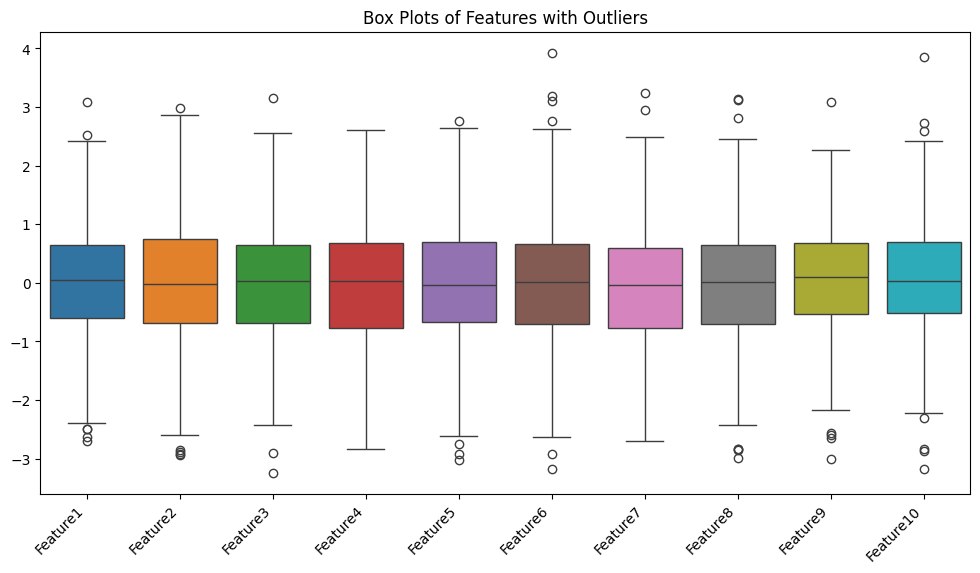

In [6]:
# prompt: check outlayers and plot it

# Calculate the IQR for each column
Q1 = PCA.quantile(0.25)
Q3 = PCA.quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on the IQR rule
outliers = ((PCA < (Q1 - 1.5 * IQR)) | (PCA > (Q3 + 1.5 * IQR))).sum()

# Print the number of outliers for each column
print(outliers)

# Create box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=PCA)
plt.xticks(rotation=45, ha='right')
plt.title('Box Plots of Features with Outliers')
plt.show()


(456, 10)


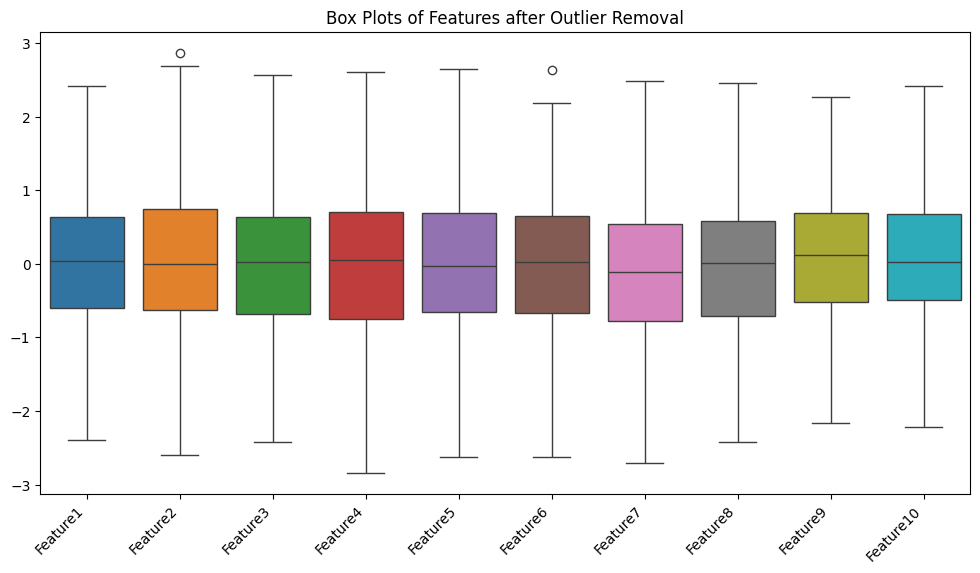

In [7]:
# prompt: remove outlayer

# Remove outliers based on the IQR rule
PCA_cleaned = PCA[~((PCA < (Q1 - 1.5 * IQR)) | (PCA > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the cleaned dataset
print(PCA_cleaned.shape)

# Create box plots to visualize outliers in the cleaned dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=PCA_cleaned)
plt.xticks(rotation=45, ha='right')
plt.title('Box Plots of Features after Outlier Removal')
plt.show()


In [8]:
# prompt: use standard scalar

from sklearn.preprocessing import StandardScaler

# Assuming PCA_cleaned is your cleaned dataframe from the previous code
x = PCA_cleaned.values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [12]:
from sklearn.decomposition import PCA

# Assuming PCA_cleaned is your cleaned dataframe from the previous code
x = PCA_cleaned.values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Instantiate PCA with 2 components
pca = PCA(n_components=2)  # reduce to 2 components for visualization

# Fit and transform the scaled data
X_pca = pca.fit_transform(x_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.12892284 0.11363883]


In [14]:
# prompt: top 5 column varience

# Calculate the variance of each column
variances = PCA_cleaned.var()

# Get the top 5 columns with the highest variance
top_5_variance = variances.nlargest(5)

top_5_variance


,0
Feature2,1.000037
Feature5,0.969680
Feature3,0.968891
Feature4,0.964031
Feature7,0.959143
